In [6]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import requests
import json


In [28]:
impurity_index_df = pd.read_csv("impurity_index.csv")
movies_df = pd.read_csv("movies_cast_2.csv")



In [8]:
impurity_index_df

,tconst,HL+M,HL+O,NL+M,NL+O,a,b,i,l,w,Total PC,Impurity Index
0,tt0035423,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,0.000
1,tt0118589,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,4.0,0.750
2,tt0120467,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,4.0,0.375
3,tt0120667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,4.0,0.375
4,tt0120679,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0,4.0,0.625
...,...,...,...,...,...,...,...,...,...,...,...,...
3535,tt8772262,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,4.0,0.375
3536,tt8946378,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,0.000
3537,tt9134216,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,4.0,0.625
3538,tt9285882,0.0,0.0,1.0,2.0,0.0,1.0,0.0,0.0,0.0,4.0,0.625


In [13]:
mcgill_actors_df = pd.read_csv("mcgill_actors.csv")


In [18]:
mcgill_actors_df[(mcgill_actors_df.ACTOR_RACE == "s") || (mcgill_actors_df.ACTOR_RACE == "s")]

,X,X.1,CHARACTER_ID,SCRIPT_ID,CHARACTER_NAME,ACTOR_NAME,PARTIAL_MATCH,GENDER,MISGENDER,CHARACTER_RACE,...,PART_WHITE,AGE,EXTRACTED_WORDS,POLYGRAPH_.WORDS,IMDB_ACTOR_HOMEPAGE,GOOGLE_IMAGE_SEARCH,NEW_ACTOR_RACE,First_name,Middle_name,Last_name
593,651,53,11765,3765,vijay joshi,Adhir Kalyan,n,m,NaN,s,...,n,26.0,185,880,http://www.imdb.com/name/nm2290876/?ref_=ttfc_...,https://www.google.com/search?q=Adhir+Kalyan+a...,s,Adhir,,Kalyan
594,652,79,15186,5068,nazeer choudhur,Ajay Naidu,y,m,NaN,s,...,n,24.0,445,560,http://www.imdb.com/name/nm0619651/?ref_=ttfc_...,https://www.google.com/search?q=Ajay+Naidu+act...,s,Ajay,,Naidu
595,653,78,9425,3033,samir nagheenan,Ajay Naidu,y,m,NaN,s,...,n,27.0,353,1012,http://www.imdb.com/name/nm0619651/?ref_=ttfc_...,https://www.google.com/search?q=Ajay+Naidu+act...,s,Ajay,,Naidu
596,654,374,10488,3365,prem,Anil Kapoor,n,m,NaN,s,...,n,52.0,1835,6210,http://www.imdb.com/name/nm0438463/?ref_=ttfc_...,https://www.google.com/search?q=Anil+Kapoor+ac...,s,Anil,,Kapoor
597,655,563,10493,3365,youngest salim,Azharuddin Mohammed Ismail,n,m,NaN,s,...,n,10.0,652,2190,http://www.imdb.com/name/nm3193259/?ref_=ttfc_...,https://www.google.com/search?q=Azharuddin+Moh...,s,Azharuddin,Mohammed,Ismail
598,656,565,3668,1530,chet,Aziz Ansari,n,m,NaN,s,...,n,28.0,1519,3055,http://www.imdb.com/name/nm2106637/?ref_=ttfc_...,https://www.google.com/search?q=Aziz+Ansari+ac...,s,Aziz,,Ansari
600,658,1939,4678,1810,sonny kapoor,Dev Patel,n,m,NaN,s,...,n,21.0,1249,2811,http://www.imdb.com/name/nm2353862/?ref_=ttfc_...,https://www.google.com/search?q=Dev+Patel+acto...,s,Dev,,Patel
601,659,1938,10485,3365,older jamal,Dev Patel,n,m,NaN,s,...,n,18.0,1203,4726,http://www.imdb.com/name/nm2353862/?ref_=ttfc_...,https://www.google.com/search?q=Dev+Patel+acto...,s,Dev,,Patel
602,660,1983,7712,2598,yusuf,Dileep Rao,n,m,NaN,s,...,n,37.0,286,541,http://www.imdb.com/name/nm2438307/?ref_=ttfc_...,https://www.google.com/search?q=Dileep+Rao+act...,s,Dileep,,Rao
603,661,1984,3673,1530,kate,Dilshad Vadsaria,n,f,NaN,s,...,n,34.0,226,530,http://www.imdb.com/name/nm2115111/?ref_=ttfc_...,https://www.google.com/search?q=Dilshad+Vadsar...,s,Dilshad,,Vadsaria


In [19]:
cleaned_race_name_df = pd.read_csv("cleaned_race_name.csv")


In [20]:
cleaned_race_name_df

,Unnamed: 0,first_name,last_name,NEW_ACTOR_RACE,race,nconst
0,0,Lauren,Bacall,w,NL+W,nm0000002
1,1,Marlon,Brando,w,HL+W,nm0000008
2,2,Gong,Li,a,NL+A,nm0000084
3,3,Armin,Mueller-Stahl,w,NL+W,nm0000090
4,4,John,Cleese,i,NL+I,nm0000092
...,...,...,...,...,...,...
5267,5267,Eric,Borsuk,a,NL+A,nm9858133
5268,5268,Vilhelm,Blomgren,w,NL+W,nm9859585
5269,5269,Roman,Davis,b,NL+B,nm9877392
5270,5270,Gabriel,Sky,NL+O,NL+O,nm9982380


In [24]:
impurity_index_df["Impurity Index"].value_counts()

0.375000    1231
0.625000     963
0.000000     831
0.500000     253
0.750000     238
0.444444      11
0.666667       5
0.571429       1
0.460000       1
0.693878       1
0.406250       1
0.720000       1
0.448980       1
0.612245       1
0.716049       1
Name: Impurity Index, dtype: int64

In [27]:
impurity_index_df[impurity_index_df["Impurity Index"]>0.74000 ]

,tconst,HL+M,HL+O,NL+M,NL+O,a,b,i,l,w,Total PC,Impurity Index
1,tt0118589,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,4.0,0.75
163,tt0206963,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,4.0,0.75
169,tt0209077,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,4.0,0.75
178,tt0211443,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,4.0,0.75
214,tt0227984,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,4.0,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...
3479,tt7025388,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,4.0,0.75
3507,tt7734218,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,4.0,0.75
3513,tt7958736,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,4.0,0.75
3518,tt8085790,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,4.0,0.75


In [29]:
movies_df

,index,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,tmdb_id,og_language,budget,revenue,ratio,ROI,averageRating,numVotes,Unnamed: 18,nconst
0,7363,tt1179904,movie,Paranormal Activity,Paranormal Activity,0,2007,NaN,86,"Horror,Mystery",23827,en,230000,194183034,0.001184,844.274061,6.3,238846,Info says budget is $15k,"['nm2209370', 'nm2913790', 'nm2104166', 'nm291..."
1,4907,tt2309260,movie,The Gallows,The Gallows,0,2015,NaN,81,"Horror,Mystery,Thriller",299245,en,100000,42664410,0.002344,426.644100,4.2,20611,NaN,"['nm3790547', 'nm6018502', 'nm4090362', 'nm225..."
2,8453,tt0876294,movie,Zombie Diaries,The Zombie Diaries,0,2006,NaN,85,"Horror,Sci-Fi",25035,en,9300,2000000,0.004650,215.053763,4.0,4755,NaN,"['nm0014714', 'nm2428131', 'nm2408572', 'nm028..."
3,9342,tt0907657,movie,Once,Once,0,2007,NaN,86,"Drama,Music,Romance",5723,en,160000,20710513,0.007726,129.440706,7.8,116662,NaN,"['nm0360598', 'nm2461627', 'nm2008013', 'nm247..."
4,2405,tt0374900,movie,Napoleon Dynamite,Napoleon Dynamite,0,2004,NaN,96,Comedy,8193,en,400000,46118097,0.008673,115.295243,6.9,218880,NaN,"['nm1417647', 'nm0708293', 'nm0340973', 'nm108..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3535,10702,tt1935194,movie,Overdrive,Overdrive,0,2017,NaN,93,"Action,Adventure,Crime",404733,en,28210303,7793,3619.954190,0.000276,5.3,14982,NaN,"['nm2207222', 'nm7188414', 'nm1869101', 'nm471..."
3536,414,tt1376213,movie,The Adventurer: The Curse of the Midas Box,The Adventurer: The Curse of the Midas Box,0,2013,NaN,100,"Adventure,Family,Fantasy",227707,en,25000000,6399,3906.860447,0.000256,5.4,6779,NaN,"['nm2902567', 'nm0790688', 'nm0372176', 'nm000..."
3537,9979,tt7869070,movie,The Fanatic,The Fanatic,0,2019,NaN,88,"Crime,Thriller",509853,en,18000000,3153,5708.848716,0.000175,4.2,11981,NaN,"['nm0000237', 'nm0001701', 'nm3132111', 'nm362..."
3538,3185,tt0254703,movie,The Point Men,The Point Men,0,2001,NaN,100,"Action,Drama",46943,en,6100000,714,8543.417367,0.000117,4.3,1161,NaN,"['nm0000483', 'nm0289098', 'nm0716490', 'nm053..."


In [30]:
merged_gi_movies_df = pd.merge(impurity_index_df, movies_df, left_on='tconst', right_on='tconst', how='left')


In [31]:
merged_gi_movies_df

,tconst,HL+M,HL+O,NL+M,NL+O,a,b,i,l,w,...,tmdb_id,og_language,budget,revenue,ratio,ROI,averageRating,numVotes,Unnamed: 18,nconst
0,tt0035423,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,11232,en,48000000,76019048,0.631421,1.583730,6.4,84717,NaN,"['nm0000212', 'nm0413168', 'nm0000630', 'nm000..."
1,tt0118589,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,...,10696,en,22000000,5271666,4.173254,0.239621,2.3,23564,NaN,"['nm0001014', 'nm0073160', 'nm0066586', 'nm000..."
2,tt0120467,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,...,19085,en,120000,14904,8.051530,0.124200,5.2,4137,NaN,"['nm0641168', 'nm0424682', 'nm0507915', 'nm083..."
3,tt0120667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,...,9738,en,100000000,333535934,0.299818,3.335359,5.7,329570,NaN,"['nm0344435', 'nm0004821', 'nm0262635', 'nm000..."
4,tt0120679,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0,...,1360,en,12000000,56298474,0.213150,4.691540,7.3,89938,NaN,"['nm0000161', 'nm0000547', 'nm0001691', 'nm053..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3535,tt8772262,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,...,530385,en,9000000,47980982,0.187574,5.331220,7.1,307254,NaN,"['nm6073955', 'nm2930503', 'nm9859585', 'nm286..."
3536,tt8946378,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,546554,en,40000000,309232797,0.129352,7.730820,7.9,609899,NaN,"['nm0185819', 'nm0262635', 'nm1869101', 'nm000..."
3537,tt9134216,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,...,554241,en,29900000,44400000,0.673423,1.484950,5.1,14856,NaN,"['nm1078479', 'nm1221047', 'nm0000491', 'nm054..."
3538,tt9285882,0.0,0.0,1.0,2.0,0.0,1.0,0.0,0.0,0.0,...,621191,en,1600000,5750000,0.278261,3.593750,6.2,7228,NaN,"['nm7906702', 'nm1951953', 'nm8780185', 'nm108..."


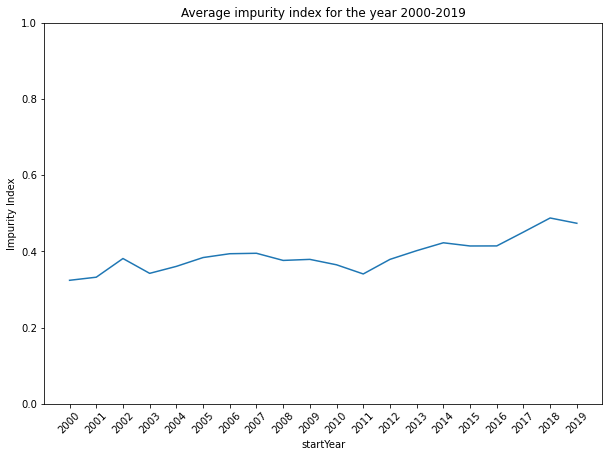

In [35]:
fig = plt.gcf()
fig.set_size_inches(10, 7)


g = sns.lineplot(data=merged_gi_movies_df.groupby("startYear")["Impurity Index"].mean() )
g.set_xticks(merged_gi_movies_df.groupby("startYear").mean().index)
g.set_title('Average impurity index for the year 2000-2019')
g.set_ylim(0,1)

plt.tick_params(axis='x', rotation=45)

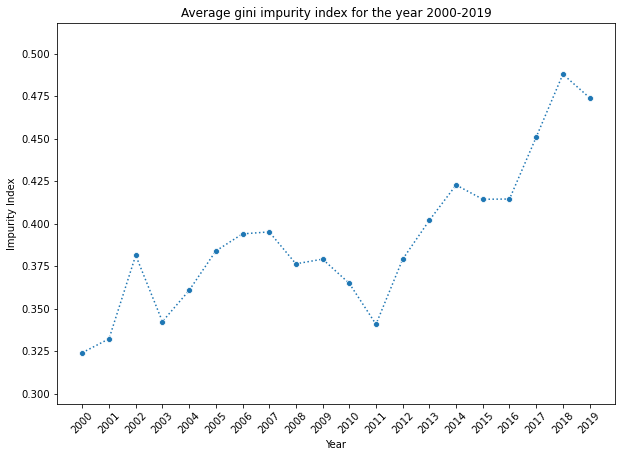

In [69]:
fig = plt.gcf()
fig.set_size_inches(10, 7)


g = sns.lineplot(data=merged_gi_movies_df.groupby("startYear")["Impurity Index"].mean(),marker="o" ,linestyle=':' )
g.set_xticks(merged_gi_movies_df.groupby("startYear").mean().index)
g.set_title('Average gini impurity index for the year 2000-2019')
g.set_ylim(np.min(merged_gi_movies_df.groupby("startYear")["Impurity Index"].mean() ) - 0.03,np.max(merged_gi_movies_df.groupby("startYear")["Impurity Index"].mean() )+0.03)
g.set_xlabel("Year")

plt.tick_params(axis='x', rotation=45)


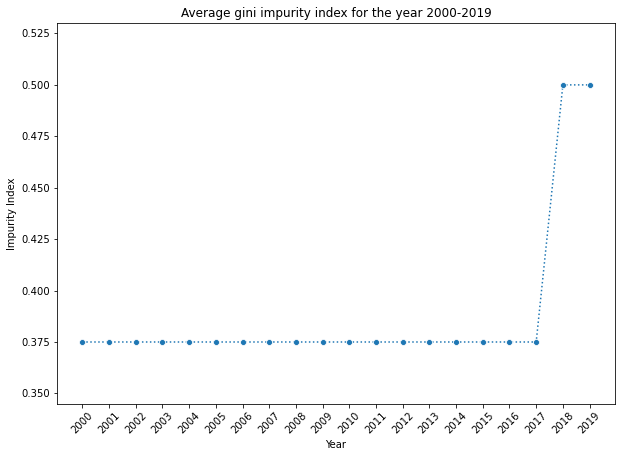

In [71]:
fig = plt.gcf()
fig.set_size_inches(10, 7)


g = sns.lineplot(data=merged_gi_movies_df.groupby("startYear")["Impurity Index"].median(),marker="o" ,linestyle=':' )
g.set_xticks(merged_gi_movies_df.groupby("startYear").median().index)
g.set_title('Average gini impurity index for the year 2000-2019')
g.set_ylim(np.min(merged_gi_movies_df.groupby("startYear")["Impurity Index"].median() ) - 0.03,np.max(merged_gi_movies_df.groupby("startYear")["Impurity Index"].median() )+0.03)
g.set_xlabel("Year")

plt.tick_params(axis='x', rotation=45)


In [73]:
merged_gi_movies_df.groupby("startYear")["Impurity Index"].describe()

,count,mean,std,min,25%,50%,75%,max
startYear,,,,,,,,
2000,138.0,0.324275,0.233799,0.0,0.00000,0.375,0.500,0.625
2001,154.0,0.332431,0.250296,0.0,0.00000,0.375,0.500,0.750
2002,160.0,0.381510,0.248227,0.0,0.28125,0.375,0.625,0.750
2003,155.0,0.342570,0.235980,0.0,0.00000,0.375,0.500,0.750
2004,171.0,0.360879,0.246837,0.0,0.00000,0.375,0.625,0.750
2005,193.0,0.384067,0.245564,0.0,0.37500,0.375,0.625,0.750
2006,210.0,0.394130,0.241156,0.0,0.37500,0.375,0.625,0.750
2007,197.0,0.395305,0.261959,0.0,0.00000,0.375,0.625,0.750
2008,191.0,0.376527,0.247257,0.0,0.18750,0.375,0.625,0.750
